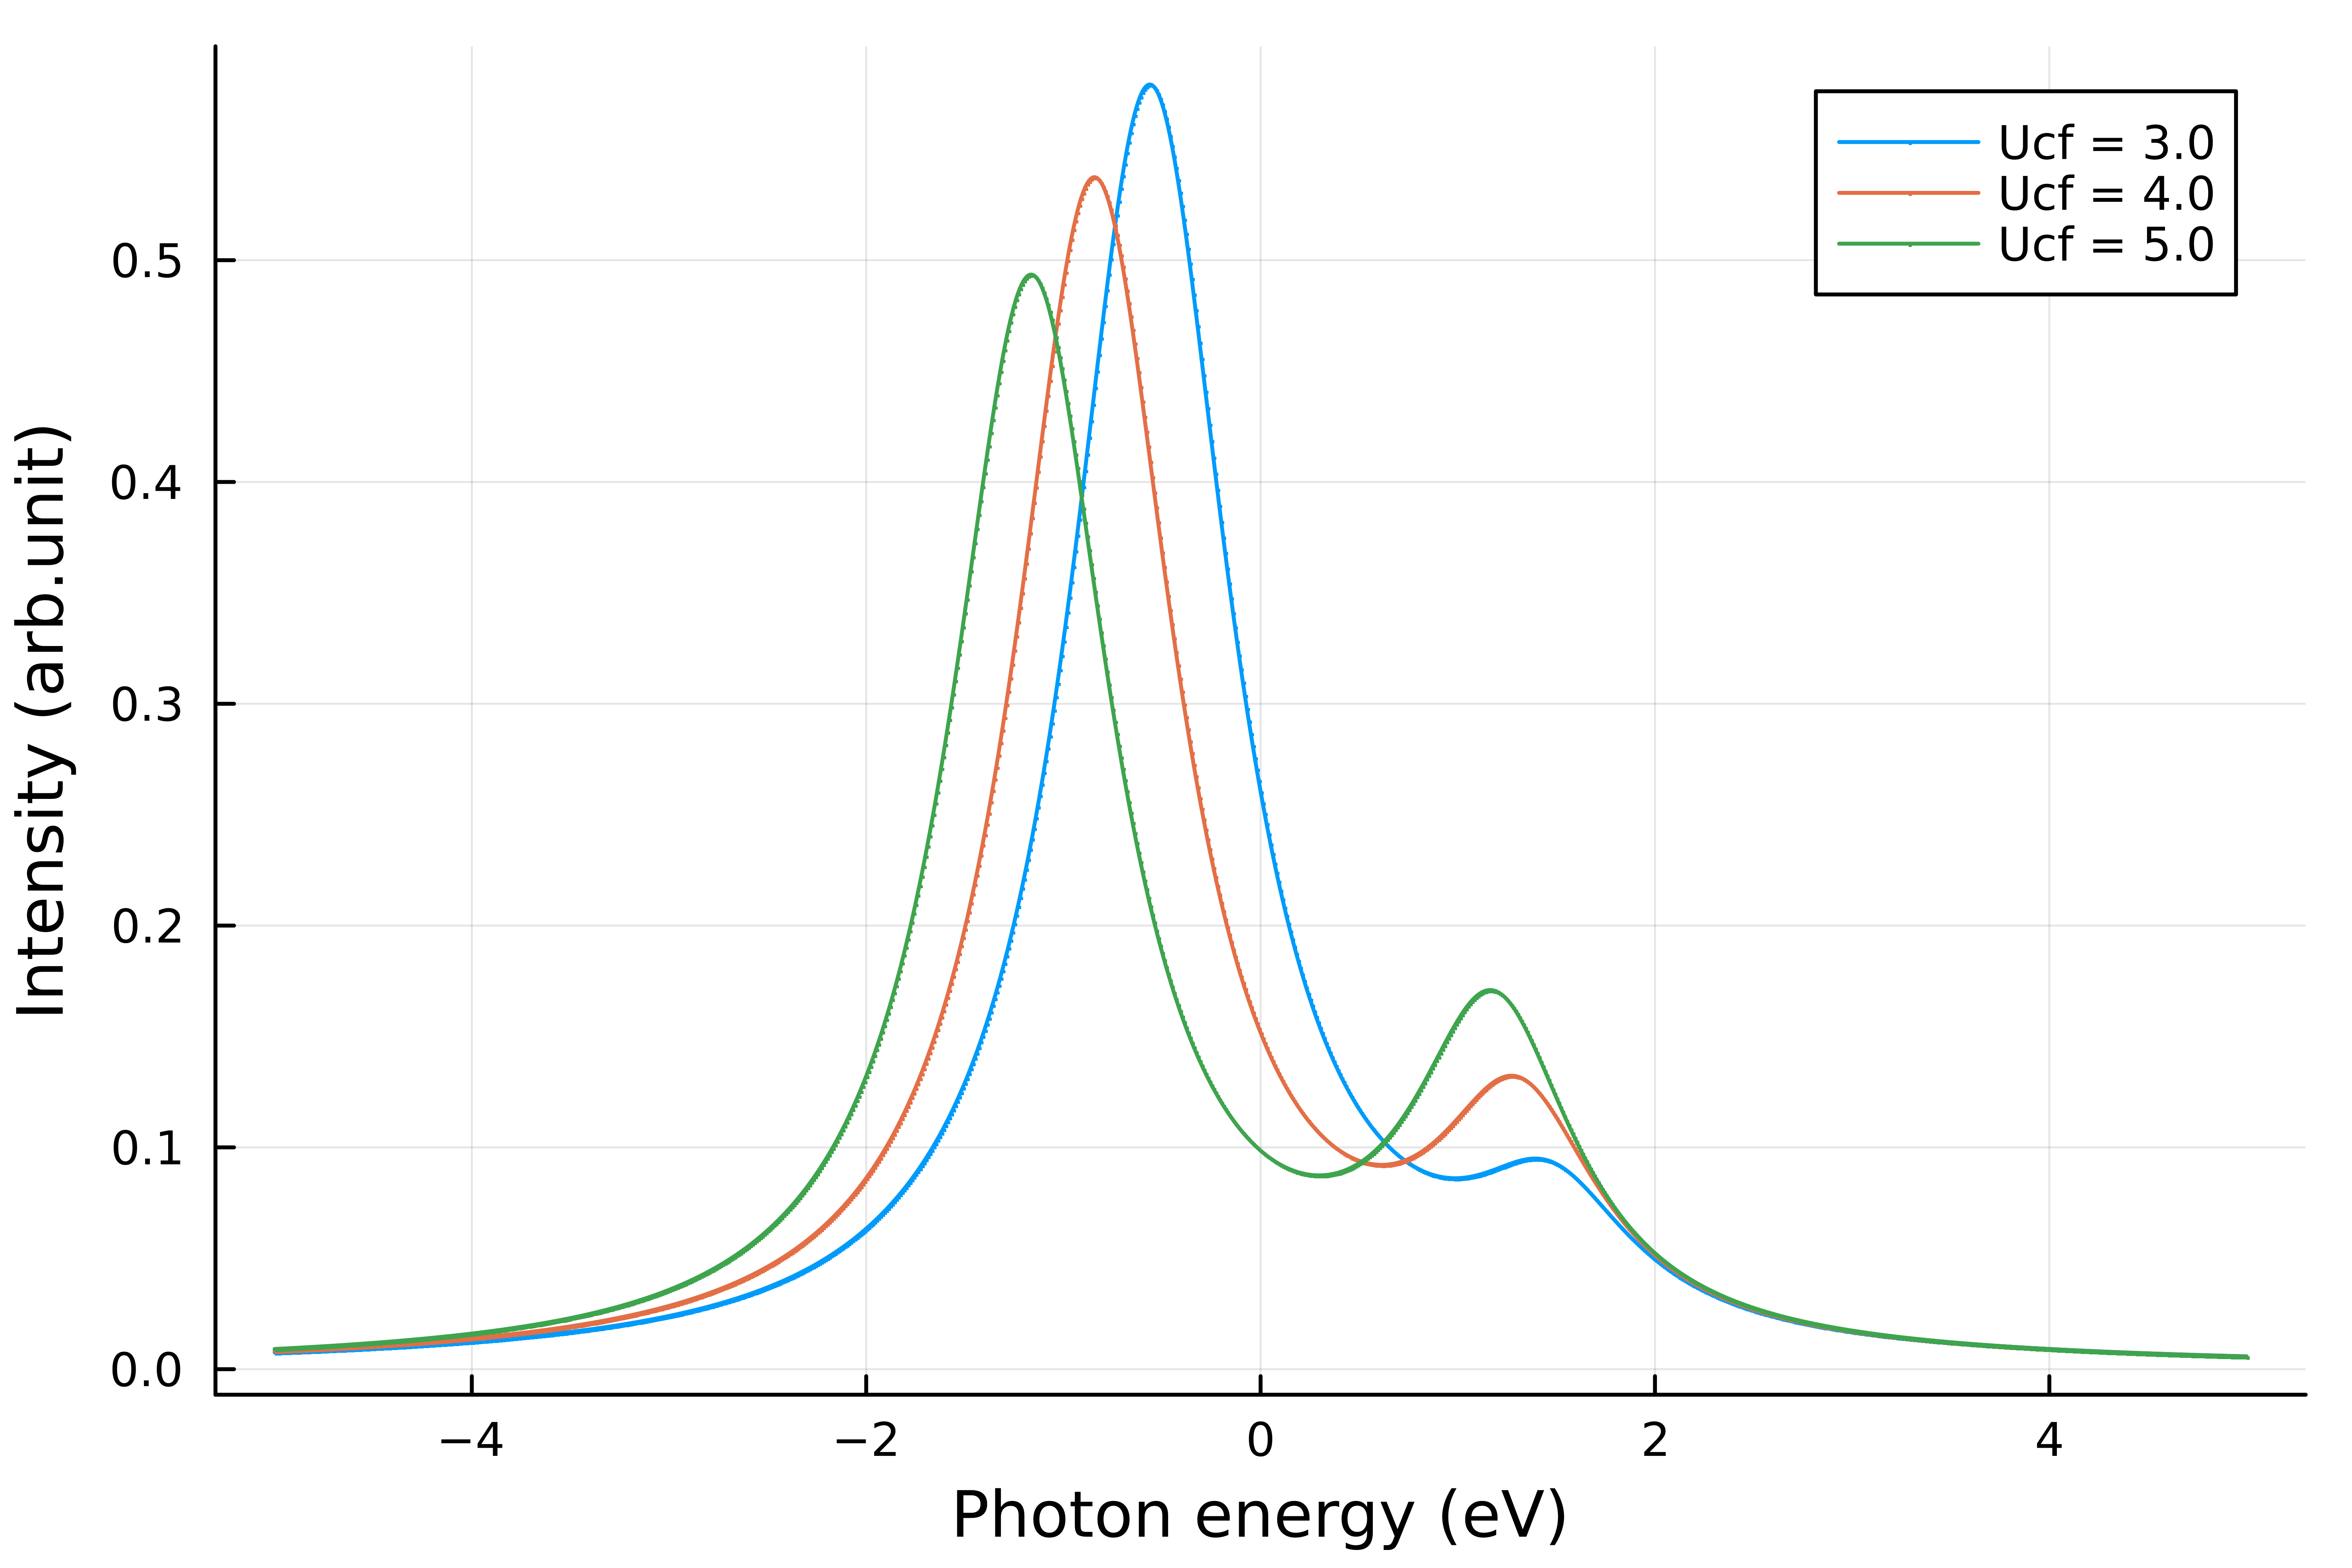

In [9]:
#UGa2
using LinearAlgebra
using Plots
using DelimitedFiles
#=
xpsのパラメータ設定に
Ucf = 1.8*Uff
を追加した
=#

p = plot(dpi=1000)


t = 1
delta = 1
Ucf_values = [3.0,4.0,5.0] 
smalldelta = 0.5

for Ucf in Ucf_values
Uff = Ucf/1.8

Hg =  [
   0 t
   t delta ]
Hf =  [
   0 t
   t delta - Ucf + Uff  ]
   Eg,Vg = eigen(Hg)
   Ef,Vf = eigen(Hf)
   
   function F1(Eg,Vg,Ef,Vf,Eb)
      return ((abs(dot(Vg[:,1],Vf[:,1])))^2)/(Eb+Eg-Ef+im*smalldelta)
   end
   function F2(Eg,Vg,Ef,Vf,Eb)
      return ((abs(dot(Vg[:,1],Vf[:,2])))^2)/(Eb+Eg-Ef+im*smalldelta)
   end
   
   data = []
   
   for Eb in -5:0.01:5
       ints = (-1 / π) * imag(F1(Eg[1], Vg, Ef[1], Vf, Eb) + F2(Eg[1], Vg, Ef[2], Vf, Eb))
       push!(data, [Eb, ints])
   end
   
   data = hcat(data...)
   x = data[1, :]
   y = data[2, :]
   
   plot!(p, x, y, xlabel="Photon energy (eV)", ylabel="Intensity (arb.unit)", label="Ucf = $Ucf", marker=:auto, markersize=0 ) #ylims=(0, 1))
   
   end

   display(p)
   